In [1]:
%reload_ext autoreload
%autoreload 2

##### Define ChEMBL and Papyrus versions

In [2]:
chembl_version = '31'
papyrus_version = '05.5'
papyrus_flavor = 'nostereo'

##### Define annotation round

In [3]:
annotation_round = 1

##### Define protein for analysis

In [4]:
analysis_accession = 'P00533'

##### Define output directory

In [5]:
from utils import *
directories_file = './directories.json'

In [6]:
accession_analysis_dir = get_mutant_analysis_path(directories_file, 'accession', annotation_round)
common_analysis_dir = get_mutant_analysis_path(directories_file, 'common', annotation_round)
compound_analysis_dir = get_mutant_analysis_path(directories_file, 'compound', annotation_round)
bioactivity_analysis_dir = get_mutant_analysis_path(directories_file, 'bioactivity', annotation_round)

##### Import analysis functions

In [7]:
# Import project path to allow for relative imports
import project_path

import os
import pandas as pd

In [8]:
from preprocessing import merge_chembl_papyrus_mutants
from mutant_analysis_accession import filter_accession_data
from mutant_analysis_common_subsets import compute_variant_activity_distribution,read_common_subset_stats_file,\
    plot_bubble_bioactivity_distribution_stats,calculate_accession_common_subset_stats
from mutant_analysis_compounds import plot_bioactivity_distribution_cluster_subset,get_clustering_stats,butina_cluster_compounds
from mutant_analysis_accession import get_statistics_across_variants

#### Check the statistics of the different types of common subsets

In [9]:
# Obtain mutant annotated bioactivity data
annotated_data = merge_chembl_papyrus_mutants(chembl_version, papyrus_version, papyrus_flavor, 1_000_000, annotation_round)

##### Check targets where a strict common subset is possible

In [10]:
# Calculate statistics per variant (full set)
stats_variant = get_statistics_across_variants(chembl_version, papyrus_version, papyrus_flavor, 1_000_000,
                                               annotation_round, accession_analysis_dir,save=False)
# Read statistics for strict common subset
strict_subset_stats = read_common_subset_stats_file(common_analysis_dir,
                              common=True,
                              sim=False,
                              sim_thres=None,
                              threshold=None, # Triggers strict common subset
                              variant_coverage=None)

In [11]:
# Enrich common subset stats with variant stats from the full set
calculate_accession_common_subset_stats(strict_subset_stats, stats_variant, aggregate=False)

,accession,variant,mean_pchembl,std_pchembl,mean_error,mean_error_strict,std_error_strict,n_accession,n_target_id,coverage,...,l1,l2,l3,l4,l5,Organism,HGNC_symbol,connectivity_variant_percentage,variant_order,connectivity_variant_fold
0,A0A045ISB3,A0A045ISB3_WT,8.242500,0.357689,0.000000,0.000000,0.000000,4,4,1.0,...,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,93.869732,1,1.000000
1,A0A045ISB3,A0A045ISB3_F161S,5.127500,0.102103,-3.115000,-3.115000,0.317779,4,4,1.0,...,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,2,61.250000
2,A0A045ISB3,A0A045ISB3_I203A,7.512500,0.151300,-0.730000,-0.730000,0.216910,4,4,1.0,...,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,3,61.250000
3,A0A045ISB3,A0A045ISB3_I207A,6.917500,0.192592,-1.325000,-1.325000,0.177904,4,4,1.0,...,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,5,61.250000
4,A0A045ISB3,A0A045ISB3_I207K,6.240000,0.127802,-2.002500,-2.002500,0.357829,4,4,1.0,...,Enzyme,Hydrolase,Other,Other,Other,Mycobacterium tuberculosis,NaN,1.532567,4,61.250000
5,A4TVL0,A4TVL0_WT,5.418889,0.123573,0.000000,0.000000,0.000000,3,3,1.0,...,Other,Other,Other,Other,Other,Magnetospirillum gryphiswaldense,NaN,88.000000,1,1.000000
6,A4TVL0,A4TVL0_Y101F,4.645000,0.347527,-0.773889,-0.773889,0.462722,3,3,1.0,...,Other,Other,Other,Other,Other,Magnetospirillum gryphiswaldense,NaN,12.000000,2,7.333333
7,B4URF0,B4URF0_WT,8.260772,0.184528,0.000000,0.000000,0.000000,3,3,1.0,...,Enzyme,Hydrolase,Other,Other,Other,Influenza A virus (strain A/Wilson-Smith/1933 ...,NaN,99.465241,1,1.000000
8,B4URF0,B4URF0_S31A,7.940000,0.268514,-0.320772,-0.320772,0.284882,3,3,1.0,...,Enzyme,Hydrolase,Other,Other,Other,Influenza A virus (strain A/Wilson-Smith/1933 ...,NaN,0.534759,2,186.000000
9,B7UPE2,B7UPE2_D516V,4.850000,0.736953,NaN,NaN,0.000000,3,3,1.0,...,Enzyme,Transferase,Other,Other,Other,Escherichia coli O127:H6 (strain E2348/69 / EPEC),NaN,42.857143,2,1.333333


In [12]:
# Check how many proteins had a common subset, and how many variants there were
strict_subset_stats_agg = calculate_accession_common_subset_stats(strict_subset_stats, stats_variant, aggregate=True)
strict_subset_stats_agg

,variant_count,common_subset_size,accession_set_size,common_subset_ratio,accession_mutant_ratio,l1,l2,l3,l4,Organism,HGNC_symbol
accession,,,,,,,,,,,
A0A045ISB3,5,4,261,1.532567,6.130268,Enzyme,Hydrolase,Other,Other,Mycobacterium tuberculosis,NaN
A4TVL0,2,3,25,12.000000,12.000000,Other,Other,Other,Other,Magnetospirillum gryphiswaldense,NaN
B4URF0,2,3,561,0.534759,0.534759,Enzyme,Hydrolase,Other,Other,Influenza A virus (strain A/Wilson-Smith/1933 ...,NaN
B7UPE2,2,3,7,42.857143,100.000000,Enzyme,Transferase,Other,Other,Escherichia coli O127:H6 (strain E2348/69 / EPEC),NaN
K7XJL6,3,7,61,11.475410,100.000000,Other,Other,Other,Other,Hepacivirus C,NaN
O00141,2,10,838,1.193317,1.431981,Enzyme,Kinase,Protein Kinase,AGC protein kinase group,Homo sapiens (Human),SGK1
O00329,2,8,3930,0.203562,0.203562,Enzyme,Transferase,Other,Other,Homo sapiens (Human),PIK3CD
O00519,2,2,1520,0.131579,0.131579,Enzyme,Hydrolase,Other,Other,Homo sapiens (Human),FAAH
O15530,2,2,965,0.207254,0.207254,Enzyme,Kinase,Protein Kinase,AGC protein kinase group,Homo sapiens (Human),PDPK1


In [13]:
# Check distribution of the size of common subsets
strict_subset_stats_agg[['common_subset_size','variant_count','common_subset_ratio']].describe()

,common_subset_size,variant_count,common_subset_ratio
count,13.000000,13.000000,13.000000
mean,8.153846,2.307692,5.939741
std,14.022875,0.854850,11.824929
min,2.000000,2.000000,0.131579
25%,2.000000,2.000000,0.534759
50%,3.000000,2.000000,1.193317
75%,7.000000,2.000000,4.109589
max,54.000000,5.000000,42.857143


##### Compounds tested on at least 2 variants. Variant coverage of 20%

In [14]:
# Read statistics for strict common subset
common_subset_20_stats = read_common_subset_stats_file(common_analysis_dir,
                              common=True,
                              sim=False,
                              sim_thres=None,
                              threshold=2, # Tested on at least 2 variants
                              variant_coverage=0.2) # variant coverage 20%
# Check how many proteins had a common subset, and how many variants there were
common_subset_20_stats_agg = calculate_accession_common_subset_stats(common_subset_20_stats, stats_variant,
                                                                   aggregate=True)
common_subset_20_stats_agg

,variant_count,common_subset_size,accession_set_size,common_subset_ratio,accession_mutant_ratio,l1,l2,l3,l4,Organism,HGNC_symbol
accession,,,,,,,,,,,
A0A045ISB3,5,4,261,1.532567,6.130268,Enzyme,Hydrolase,Other,Other,Mycobacterium tuberculosis,NaN
A3EZI9,3,30,794,3.778338,15.239295,Enzyme,Protease,Serine protease,Serine protease PA clan,Hepacivirus C,NaN
A3EZJ3,17,8,783,1.021711,4.725415,Other,Other,Other,Other,Hepacivirus C,NaN
A4TVL0,2,3,25,12.000000,12.000000,Other,Other,Other,Other,Magnetospirillum gryphiswaldense,NaN
B4URF0,2,3,561,0.534759,0.534759,Enzyme,Hydrolase,Other,Other,Influenza A virus (strain A/Wilson-Smith/1933 ...,NaN
B7UPE2,2,3,7,42.857143,100.000000,Enzyme,Transferase,Other,Other,Escherichia coli O127:H6 (strain E2348/69 / EPEC),NaN
C1KIQ2,5,6,37,16.216216,91.891892,Enzyme,Protease,Serine protease,Other,Hepacivirus C,NaN
D5F1R0,2,3,14,21.428571,64.285714,Enzyme,Hydrolase,Other,Other,Influenza A virus (A/Brisbane/59/2007(H1N1)),NaN
K7XJL6,3,23,61,37.704918,100.000000,Other,Other,Other,Other,Hepacivirus C,NaN


In [15]:
# Check distribution of the size of common subsets
common_subset_20_stats_agg[['common_subset_size','variant_count','common_subset_ratio']].describe()

,common_subset_size,variant_count,common_subset_ratio
count,23.000000,23.000000,23.000000
mean,45.608696,3.652174,7.901883
std,128.154643,3.392622,12.476821
min,2.000000,2.000000,0.002659
25%,3.000000,2.000000,0.371007
50%,4.000000,2.000000,1.324503
75%,9.000000,3.500000,9.823673
max,553.000000,17.000000,42.857143


##### Compounds tested on at least 2 variants. Variant coverage of 20% (including similarity threshold of 80%)

In [16]:
# Read statistics for strict common subset
common_subset_2080_stats = read_common_subset_stats_file(common_analysis_dir,
                              common=True,
                              sim=True,
                              sim_thres=0.8,
                              threshold=2, # Tested on at least 2 variants
                              variant_coverage=0.2) # variant coverage 20%
# Check how many proteins had a common subset, and how many variants there were
common_subset_2080_stats_agg = calculate_accession_common_subset_stats(common_subset_2080_stats, stats_variant,
                                                                 aggregate=True)
common_subset_2080_stats_agg

,variant_count,common_subset_size,accession_set_size,common_subset_ratio,accession_mutant_ratio,l1,l2,l3,l4,Organism,HGNC_symbol
accession,,,,,,,,,,,
A0A045ISB3,5,4,261,1.532567,6.130268,Enzyme,Hydrolase,Other,Other,Mycobacterium tuberculosis,NaN
A3EZI9,3,31,794,3.904282,15.239295,Enzyme,Protease,Serine protease,Serine protease PA clan,Hepacivirus C,NaN
A3EZJ3,17,8,783,1.021711,4.725415,Other,Other,Other,Other,Hepacivirus C,NaN
A4TVL0,2,3,25,12.000000,12.000000,Other,Other,Other,Other,Magnetospirillum gryphiswaldense,NaN
B4URF0,2,3,561,0.534759,0.534759,Enzyme,Hydrolase,Other,Other,Influenza A virus (strain A/Wilson-Smith/1933 ...,NaN
B7UPE2,2,3,7,42.857143,100.000000,Enzyme,Transferase,Other,Other,Escherichia coli O127:H6 (strain E2348/69 / EPEC),NaN
C1KIQ2,5,6,37,16.216216,91.891892,Enzyme,Protease,Serine protease,Other,Hepacivirus C,NaN
D5F1R0,2,3,14,21.428571,64.285714,Enzyme,Hydrolase,Other,Other,Influenza A virus (A/Brisbane/59/2007(H1N1)),NaN
K7XJL6,3,23,61,37.704918,100.000000,Other,Other,Other,Other,Hepacivirus C,NaN


In [17]:
# Check distribution of the size of common subsets
common_subset_2080_stats_agg[['common_subset_size','variant_count','common_subset_ratio']].describe()

,common_subset_size,variant_count,common_subset_ratio
count,22.000000,22.000000,22.000000
mean,47.772727,3.727273,8.301925
std,131.156007,3.452836,12.642015
min,2.000000,2.000000,0.126783
25%,3.000000,2.000000,0.585571
50%,4.000000,2.000000,1.428535
75%,9.500000,3.750000,10.911836
max,555.000000,17.000000,42.857143


#### Plot bioactivity distribution for common subsets for target of interest

##### All datapoints

P00533 done.


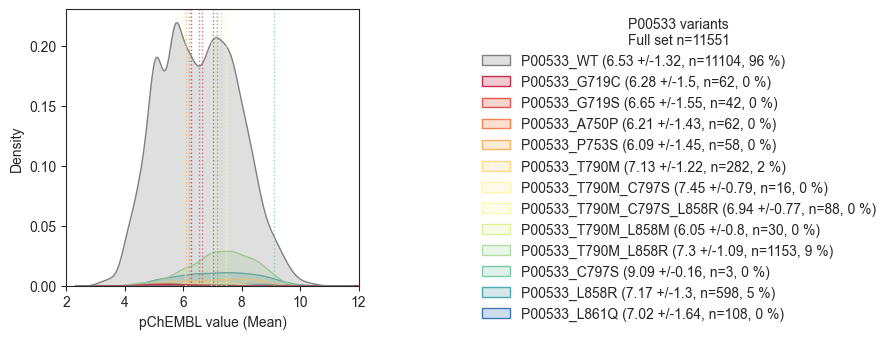

In [18]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=False, sim=False, sim_thres=None,
                                      threshold=None, variant_coverage=None, plot=True, hist=False, plot_mean=True,
                                      color_palette=None, save_dataset=True,output_dir=common_analysis_dir)

##### Compounds tested on at least 2 variants

P00533 done.


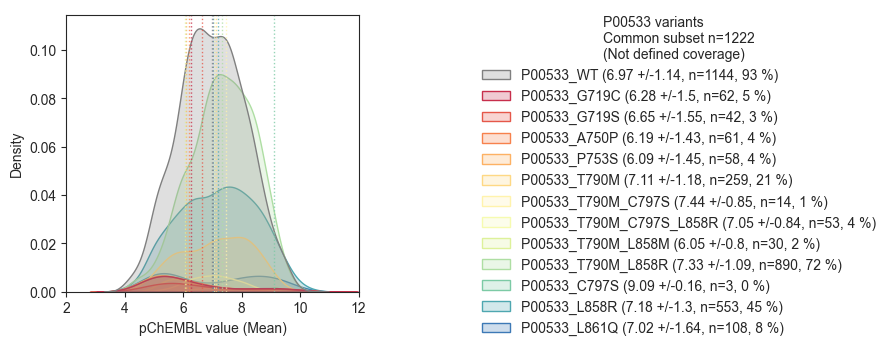

In [19]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=True, sim=False, sim_thres=None,
                                      threshold=2, variant_coverage=None, plot=True, hist=False,
                                      plot_mean=True, color_palette=None,
                                      save_dataset=True,output_dir=common_analysis_dir)

##### Compounds tested on at least 2 variants. Variant coverage of 1%

P00533 done.


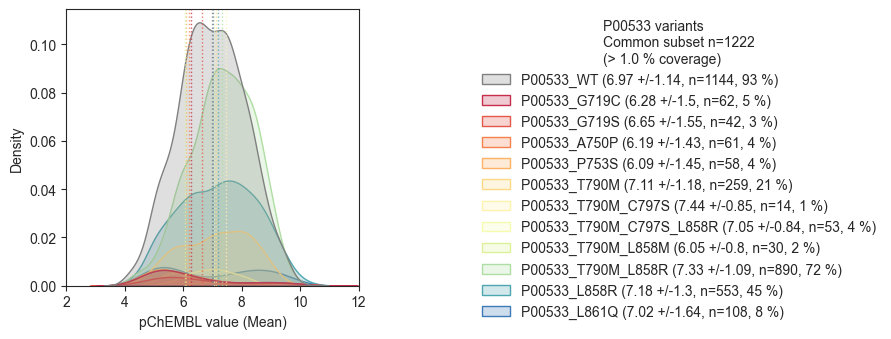

In [20]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=True, sim=False, sim_thres=None,
                                      threshold=2, variant_coverage=0.01, plot=True, hist=False,
                                      plot_mean=True, color_palette=None,
                                      save_dataset=True,output_dir=common_analysis_dir)

##### Compounds tested on at least 2 variants. Variant coverage of 20%

P00533 done.


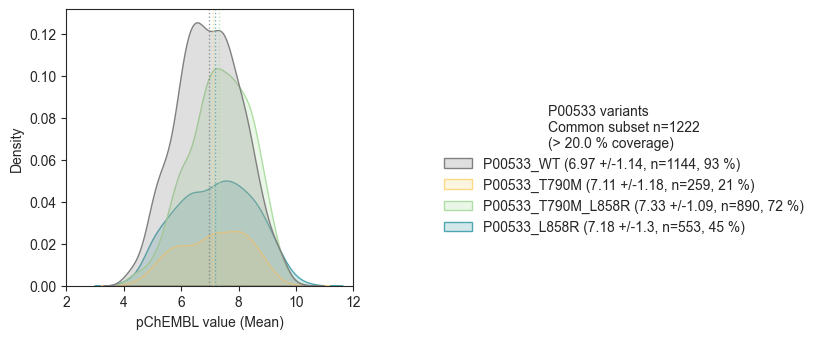

In [21]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=True, sim=False, sim_thres=None,
                                      threshold=2, variant_coverage=0.2, plot=True, hist=False,
                                      plot_mean=True, color_palette=None,
                                      save_dataset=True,output_dir=common_analysis_dir)

##### Compounds tested on at least 2 variants. Variant coverage of 20% (including similarity threshold of 80%)

P00533 done.


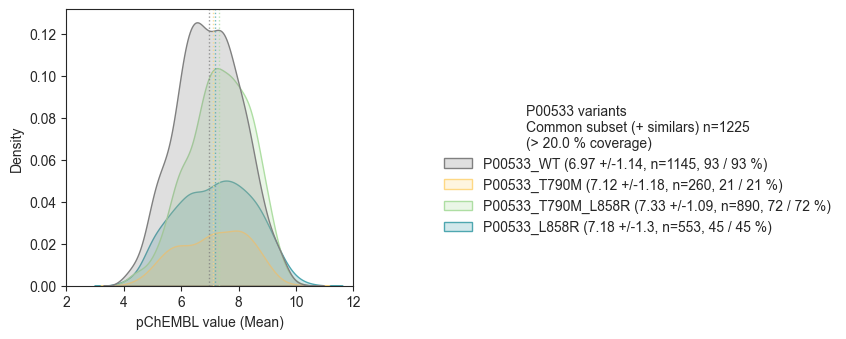

In [22]:
compute_variant_activity_distribution(annotated_data, analysis_accession, common=True, sim=True, sim_thres=0.8,
                                      threshold=2, variant_coverage=0.2, plot=True, hist=False,
                                      plot_mean=True,color_palette=None,
                                      save_dataset=True,output_dir=common_analysis_dir)

##### Plot bioactivity distribution summary across different types of subsets

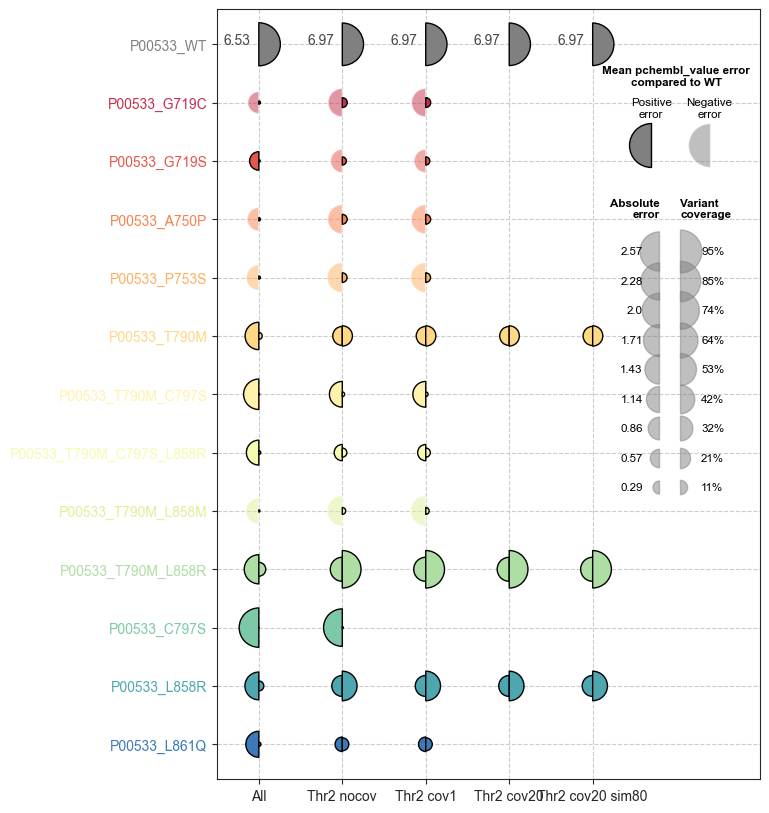

In [23]:
plot_bubble_bioactivity_distribution_stats(common_analysis_dir, 'common_subsets', analysis_accession, 'mean_error',
                                           bioactivity_analysis_dir)

#### Plot bioactivity distribution for top 10 Butina clusters

total # clusters:  120
# clusters with only 1 compound:  62
# clusters with >5 compounds:  25
# clusters with >25 compounds:  10
# clusters with >100 compounds:  2


C:\Users\gorostiolam\AppData\Local\Continuum\anaconda3\envs\mutants-in-pcm\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:260: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.
P00533 done.


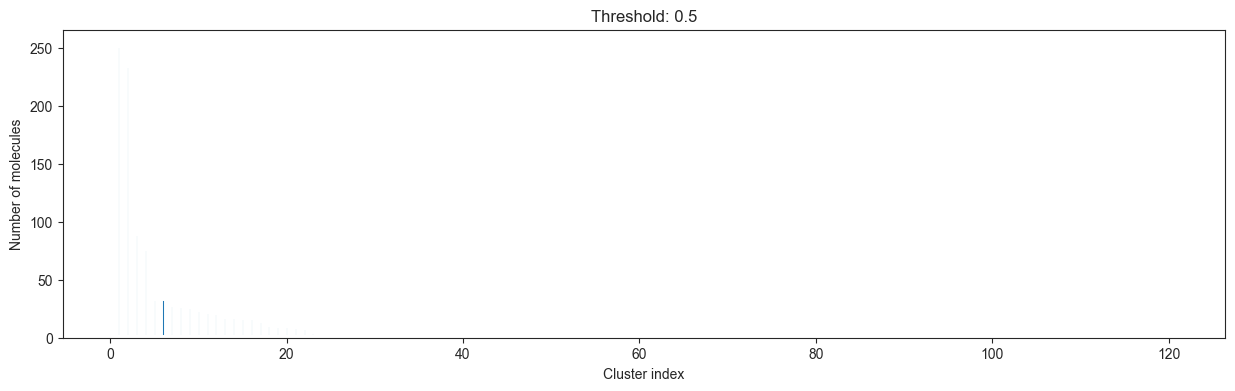

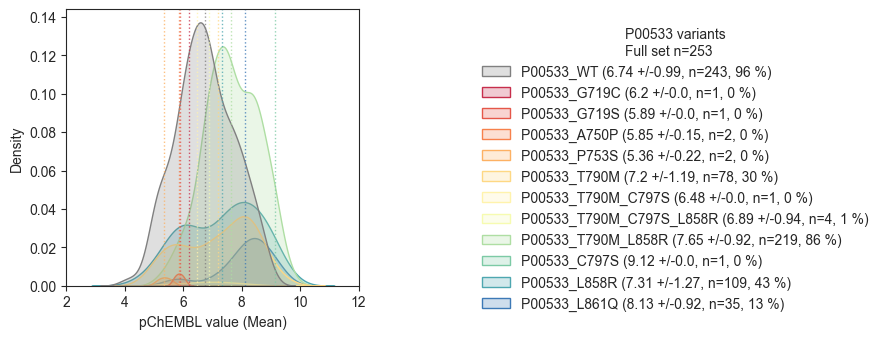

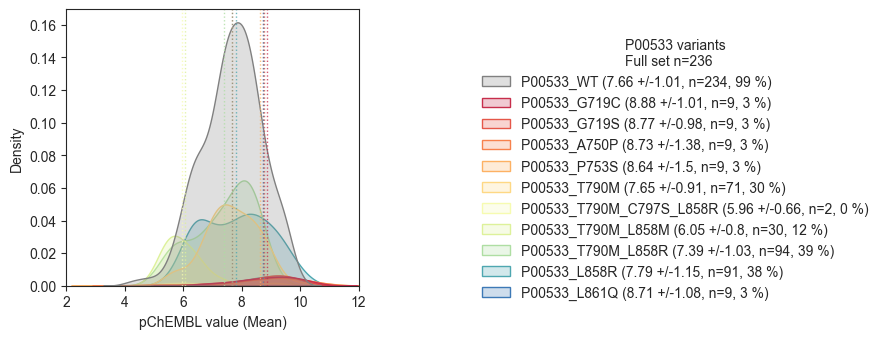

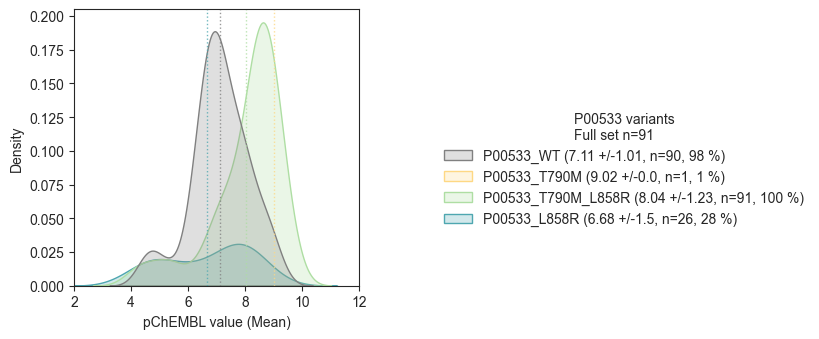

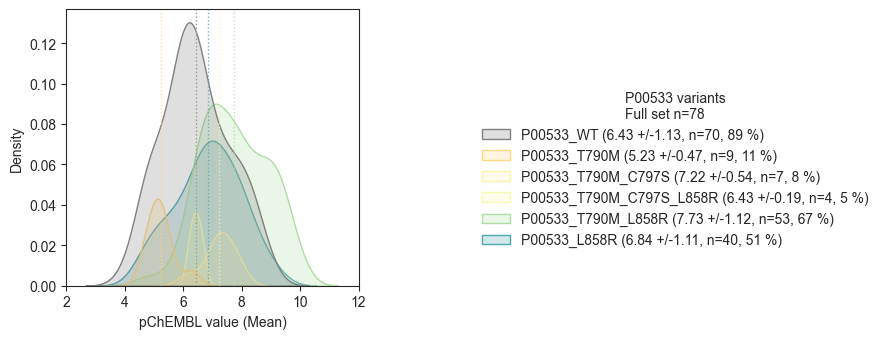

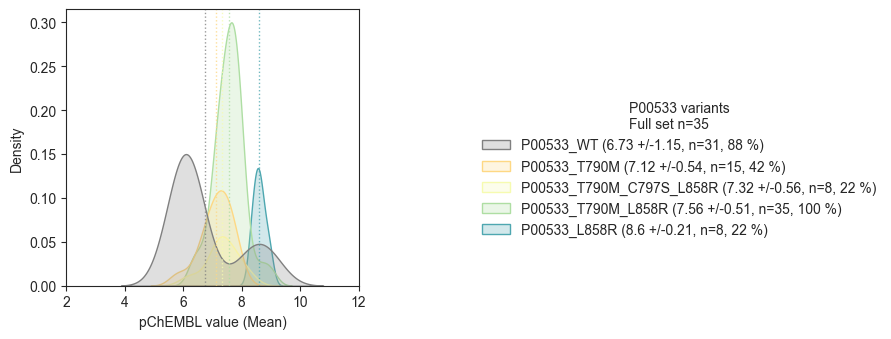

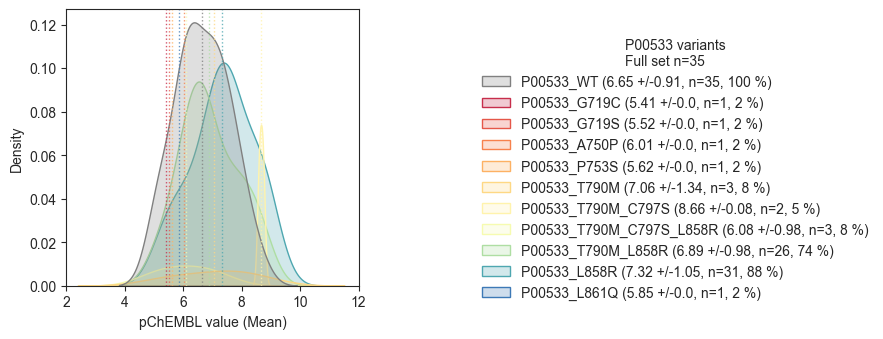

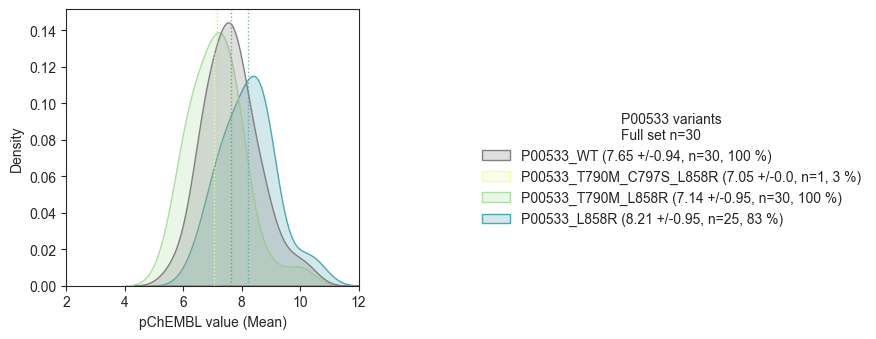

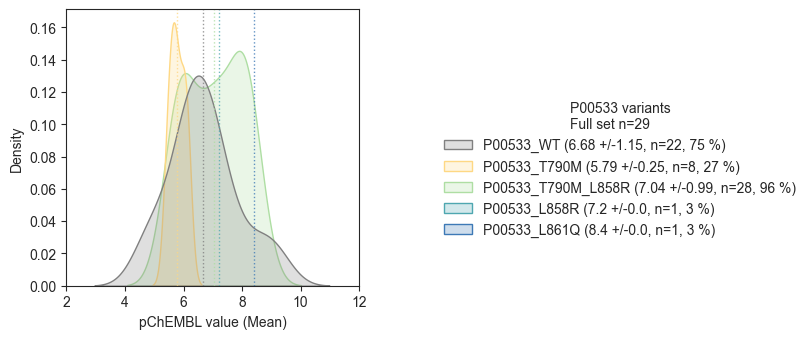

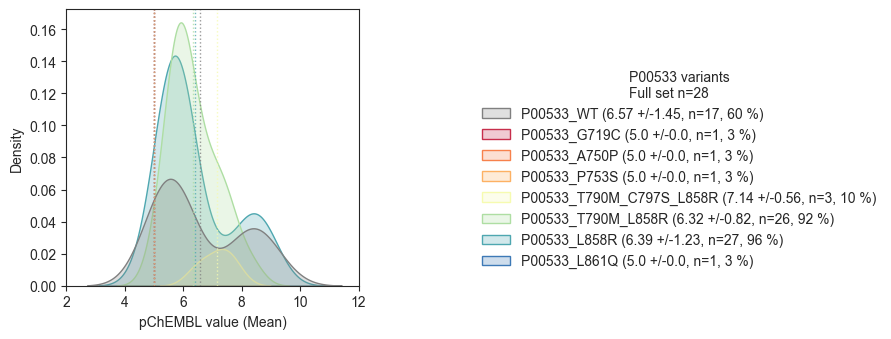

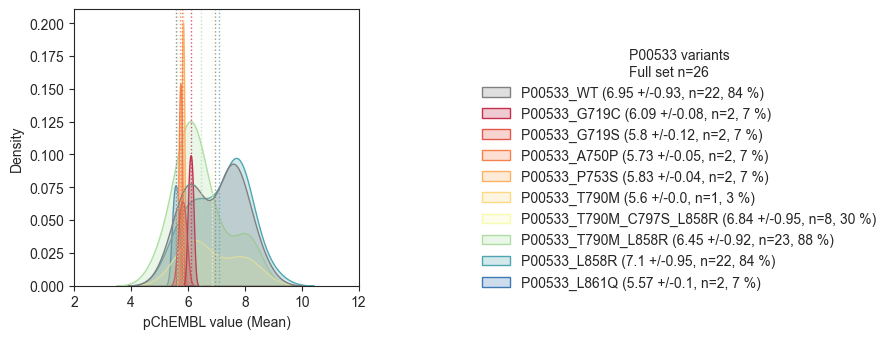

In [25]:
plot_bioactivity_distribution_cluster_subset(analysis_accession, annotation_round, compound_analysis_dir)

In [9]:
get_clustering_stats(analysis_accession, compound_analysis_dir, 'full_set', '0.5')

Number of clusters: 120
Number of compounds in clusters: 1222
Number of compounds per cluster:
Cluster 1: 253 compounds
Cluster 2: 236 compounds
Cluster 3: 91 compounds
Cluster 4: 78 compounds
Cluster 5: 35 compounds
Cluster 6: 35 compounds
Cluster 7: 30 compounds
Cluster 8: 29 compounds
Cluster 9: 28 compounds
Cluster 10: 26 compounds
Cluster 11: 24 compounds
Cluster 12: 23 compounds
Cluster 13: 20 compounds
Cluster 14: 20 compounds
Cluster 15: 19 compounds
Cluster 16: 19 compounds
Cluster 17: 16 compounds
Cluster 18: 13 compounds
Cluster 19: 12 compounds
Cluster 20: 12 compounds
Cluster 21: 11 compounds
Cluster 22: 10 compounds
Cluster 23: 7 compounds
Cluster 24: 6 compounds
Cluster 25: 6 compounds
Cluster 26: 5 compounds
Cluster 27: 5 compounds
Cluster 28: 5 compounds
Cluster 29: 5 compounds
Cluster 30: 4 compounds
Cluster 31: 4 compounds
Cluster 32: 4 compounds
Cluster 33: 4 compounds
Cluster 34: 4 compounds
Cluster 35: 4 compounds
Cluster 36: 4 compounds
Cluster 37: 4 compounds
Cl

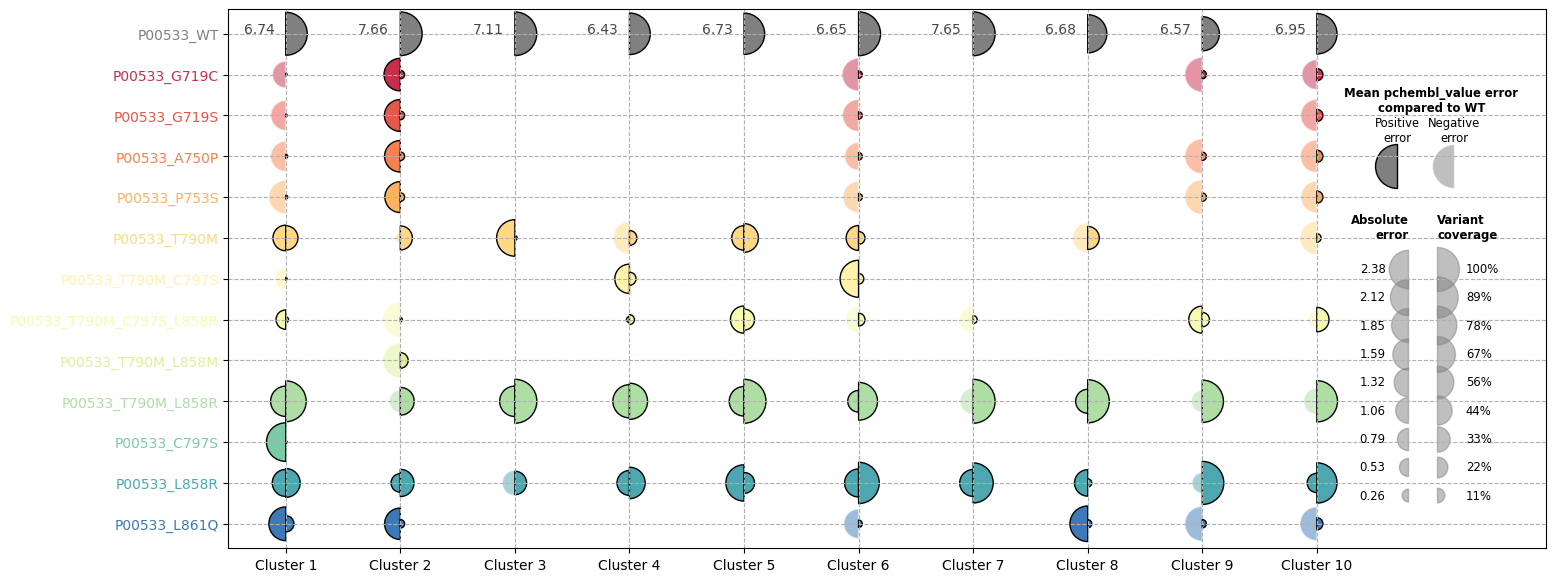

In [10]:
plot_bubble_bioactivity_distribution_stats(compound_analysis_dir,
                                           'butina_clusters',
                                           analysis_accession, 'mean_error',bioactivity_analysis_dir)